# COGS 108 - Final Project 

# Overview

We are interested in analyzing the prevalence of obesity in the United States and how it is influenced by environmental and educational factors. A sedentary lifestyle has become the norm for most working Americans. Much of their time is spent sitting either at work or at home. Due to demanding work schedules, people lack the time and energy to pursue active lifestyles. The modern work life has also contributed to poor eating habits characterized by high calorie foods and large portion sizes. People in general do not have time to prepare healthy, home cooked meals every day. The convenience of fast food has made it a popular alternative. Lack of physical activity and poor diet choices have largely influenced obesity in the United States.

We wanted to better understand the factors that correlate to obesity. There have been various studies done in the past showing a high correlation between income and obesity. So instead we wanted to focus on factors that do not have obvious correlation to obesity level such as education level, recreation/gym facility density, and access to stores. 

# Names

- Christopher Guan
- Diana Issatayeva
- Angela Liu
- Ana Palma
- Melody Xue

# Group Members IDs

- A13513127
- A15541440
- A14400029
- A13737577
- A12782726

# Research Question

How do factors such as access to grocery stores, recreation/fitness facility density, and education levels correlate with obesity levels in the United States? 

## Background and Prior Work

"Inequality in the Built Environment Underlies Key Health Disparities" describes a study conducted at the University of Minnesota that aimed to assess the geographic and social distributions of physical activity facilities and their relationship to obesity. It was revealed that groups with lower socio-economic status were less likely to have facilities around their neighborhoods, which in turn was associated with decreased physical activity and increased overweight.

In "Neighborhood Impact on Healthy Food Availability and Pricing in Food Stores," the author examines the impact of price and availability of healthy food in food stores and its correlation to obesity, cardiovascular diseases and cancer. The study indicated that a key factor in obesity prevention is the accessibility to grocery stores with healthy food options; however, large chain supermarkets stray away from opening in lower income neighborhoods. 

Although, education allows for more food opportunities, Micheal Gard and Jan Wright's study described in "Managing Uncertainty: Obesity Discourses and Physical Education in a Risk Society" argues how 
how obesity could be a product of expert knowledge taught in physical education classes; this may construct anxiety surrounding body images, and in turn be detrimental to students. We want to examine the consequences and possible correlations between education and obesity. 

Despite fitness facility density being correlated to socio-economic status, we will not analyze income as a determining factor for obesity. We aim to find the correlation between factors that directly influence obesity, such as access to grocery stores and gym facilities. It is likely that easier access to these things will enable people to choose healthier lifestyles, thereby preventing obesity. There is insufficient evidence that obesity is directly caused by socio-economic status, but with sufficient data analysis, it is possible to show causation with the other factors previously mentioned. 

Various studies have also shown that obesity is correlated with education. Individuals with lower income or education levels are more likely to suffer from obesity due to their lack of awareness on harmful eating habits and their inability to afford healthier food options. 

References (include links):
- 1) Inequality in the Built Environment Underlies Key Health Disparities in Physical Activity and Obesity [https://pediatrics.aappublications.org/content/117/2/417]
- 2) Managing Uncertainty: Obesity Discourses and Physical Education in a Risk Society [https://link.springer.com/article/10.1023/A:1012238617836]
- 3) Neighborhood Impact on Healthy Food Availability and Pricing in Food Stores [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3071013/]

# Hypothesis


We hypothesize that higher education would negatively correlate with obesity the most. Higher education leads to higher paying jobs and thus more opportunities and economic freedom to buy healthier food option. Because eating healthy is often more expensive in the United States, people with lower incomes or less education are more likely to lean towards cheaper fast food options. 

# Dataset(s)

We will analyze two sources of data from the United States Department of Agriculture Economic Research Service:

1. 
- Dataset Name: Food Environment Atlas 
- Link: https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads.aspx
- Number of observations: ~3000

2. 
- Dataset Name: Education 
- Link:  https://www.ers.usda.gov/data-products/county-level-data-sets/
- Number of observations: ~3000 

Each of these datasets has roughly 3000 observations as they are organized by all of the different counties in the United States. Coming from a federal government department, it is a trustworthy dataset that will provide us granular and enough data to be able to draw conclusions on our question.  

The Food Environment Atlas provides us with 278 variables that we can use to analyze and help us answer our question. Although we might use more factors available to us in this dataset as we continue to work on the project, we wanted to focus on a smaller number to begin with. In particular, these variables aim to give us a better idea of what kind of resources are available to each county. We will utilize the “population count in 2015 that have low access to stores” and the “number of recreation & fitness facilities per 1000 people in 2014” to have some insight on the infrastructure in each area and how they may affect obesity levels. Other variables that are left to our disposal include the poverty rate, percentage of various races, and food-assistance program participation.

The Education dataset has 31 variables, corresponding to various years that data was collected and 4 different levels of education: less than high school diploma, high school diploma, some college, and Bachelor's degree or higher. These 4 levels are described with percentage of adults and population count who have achieved the different levels of education. Because we also wanted to consider factors that are not directly related to food and health, analyzing a population’s education level would produce new insights into if it is a factor in or has a correlation to obesity. 

We will be merging the two datasets together by finding the corresponding county codes in each of the datasets. 

# Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

Describe your data cleaning steps here.

## Education Dataset Cleaning

In [2]:
xls_Education = pd.ExcelFile("Education.xls")
df_ed = xls_Education.parse('Education')
display(df_ed)

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,...,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,NaN,...,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,NaN,...,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,2.0,...,12.3,33.6,29.1,25.0
...,...,...,...,...,...,...,...,...,...
3280,72149,PR,Villalba Municipio,2.0,...,27.3,33.6,19.4,19.7
3281,72151,PR,Yabucoa Municipio,1.0,...,32.0,24.9,26.0,17.2
3282,72153,PR,Yauco Municipio,3.0,...,28.4,31.3,17.8,22.5


In [3]:
# Drop columns from previous years and keep most recent (2013-2017)
list(df_ed)

df_ed=df_ed.drop(['2003 Urban Influence Code','2013 Rural-urban Continuum Code','2003 Rural-urban Continuum Code','2013 Urban Influence Code','Less than a high school diploma, 1970',
 'High school diploma only, 1970',
 'Some college (1-3 years), 1970',
 'Four years of college or higher, 1970',
 'Percent of adults with less than a high school diploma, 1970',
 'Percent of adults with a high school diploma only, 1970',
 'Percent of adults completing some college (1-3 years), 1970',
 'Percent of adults completing four years of college or higher, 1970',
 'Less than a high school diploma, 1980',
 'High school diploma only, 1980',
 'Some college (1-3 years), 1980',
 'Four years of college or higher, 1980',
 'Percent of adults with less than a high school diploma, 1980',
 'Percent of adults with a high school diploma only, 1980',
 'Percent of adults completing some college (1-3 years), 1980',
 'Percent of adults completing four years of college or higher, 1980',
 'Less than a high school diploma, 1990',
 'High school diploma only, 1990',
 "Some college or associate's degree, 1990",
 "Bachelor's degree or higher, 1990",
 'Percent of adults with less than a high school diploma, 1990',
 'Percent of adults with a high school diploma only, 1990',
 "Percent of adults completing some college or associate's degree, 1990",
 "Percent of adults with a bachelor's degree or higher, 1990",
 'Less than a high school diploma, 2000',
 'High school diploma only, 2000',
 "Some college or associate's degree, 2000",
 "Bachelor's degree or higher, 2000",
 'Percent of adults with less than a high school diploma, 2000',
 'Percent of adults with a high school diploma only, 2000',
 "Percent of adults completing some college or associate's degree, 2000",
 "Percent of adults with a bachelor's degree or higher, 2000",],axis=1)

# Display the new dataframe and the column names
display(df_ed)
list(df_ed)

,FIPS Code,State,Area name,"Less than a high school diploma, 2013-17",...,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,2.74e+07,...,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,4.81e+05,...,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,4.52e+03,...,12.3,33.6,29.1,25.0
...,...,...,...,...,...,...,...,...,...
3280,72149,PR,Villalba Municipio,4.23e+03,...,27.3,33.6,19.4,19.7
3281,72151,PR,Yabucoa Municipio,7.72e+03,...,32.0,24.9,26.0,17.2
3282,72153,PR,Yauco Municipio,7.51e+03,...,28.4,31.3,17.8,22.5


['FIPS Code',
 'State',
 'Area name',
 'Less than a high school diploma, 2013-17',
 'High school diploma only, 2013-17',
 "Some college or associate's degree, 2013-17",
 "Bachelor's degree or higher, 2013-17",
 'Percent of adults with less than a high school diploma, 2013-17',
 'Percent of adults with a high school diploma only, 2013-17',
 "Percent of adults completing some college or associate's degree, 2013-17",
 "Percent of adults with a bachelor's degree or higher, 2013-17"]

In [4]:
# Rename the FIPS column name to be able to merge later
df_ed=df_ed.rename(index=str, columns={"FIPS Code": "FIPS", })

## Food Environmental Atlas Dataset Cleaning

We extract only the data that we want to use in our analysis from the Atlas.

In [5]:
# Read in the data from Food Evironmental Atlas excel spreadsheet into pandas data frame
stores_df = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='STORES')
health_df = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='HEALTH')

In [6]:
# Separate the neccessary columns from the table
stores_var_list = ['GROC14', 'GROCPTH14', 'FIPS']
stores_df = stores_df[stores_var_list]

health_var_list = ['PCT_OBESE_ADULTS13', 'RECFAC14', 'RECFACPTH14', 'FIPS']
health_df = health_df[health_var_list]

In [7]:
stores_df

,GROC14,GROCPTH14,FIPS
0,4,0.07,1001
1,29,0.14,1003
2,5,0.19,1005
...,...,...,...
3140,2,0.10,56041
3141,2,0.24,56043
3142,4,0.56,56045


In [8]:
health_df

,PCT_OBESE_ADULTS13,RECFAC14,RECFACPTH14,FIPS
0,34.1,5,0.09,1001
1,27.4,25,0.12,1003
2,44.4,0,0.00,1005
...,...,...,...,...
3140,27.9,2,0.10,56041
3141,27.7,1,0.12,56043
3142,29.2,0,0.00,56045


In [9]:
# Merging two Atlas dataframes on FIPS column
df_merged = stores_df.merge(health_df, left_on='FIPS', right_on='FIPS')

In [10]:
# Put FIPS column first 
# Get a list of columns
cols = list(df_merged)

# Move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('FIPS')))
df_merged = df_merged.loc[:, cols]
df_merged

,FIPS,GROC14,GROCPTH14,PCT_OBESE_ADULTS13,RECFAC14,RECFACPTH14
0,1001,4,0.07,34.1,5,0.09
1,1003,29,0.14,27.4,25,0.12
2,1005,5,0.19,44.4,0,0.00
...,...,...,...,...,...,...
3140,56041,2,0.10,27.9,2,0.10
3141,56043,2,0.24,27.7,1,0.12
3142,56045,4,0.56,29.2,0,0.00


In [11]:
# Rename the column names to be more clear
df_merged = df_merged.rename(index=str, columns={"GROC14": "GROC_STORES_COUNT_2014", "GROCPTH14": "GROC_STORES_PER1000_2014", "PCT_OBESE_ADULTS13": "ADULT_OBESITY_RATE_2013", "RECFAC14": "RECREATION_FITNESS_FACIL_COUNT_2014", "RECFACPTH14": "RECREATION_FITNESS_FACIL_PER1000_2014" })

In [12]:
# Check for data types from the Atlas dataset
df_merged.dtypes

FIPS                                       int64
GROC_STORES_COUNT_2014                     int64
GROC_STORES_PER1000_2014                 float64
ADULT_OBESITY_RATE_2013                  float64
RECREATION_FITNESS_FACIL_COUNT_2014        int64
RECREATION_FITNESS_FACIL_PER1000_2014    float64
dtype: object

In [13]:
# Check for data types from the Education dataset
df_ed.dtypes

FIPS                                                                          int64
State                                                                        object
Area name                                                                    object
                                                                             ...   
Percent of adults with a high school diploma only, 2013-17                  float64
Percent of adults completing some college or associate's degree, 2013-17    float64
Percent of adults with a bachelor's degree or higher, 2013-17               float64
Length: 11, dtype: object

In [14]:
# Merging the Education and Food Environmental Atlas dataframes together on FIPS column
df = df_ed.merge(df_merged, left_on='FIPS', right_on='FIPS')
display(df)

,FIPS,State,Area name,"Less than a high school diploma, 2013-17",...,GROC_STORES_PER1000_2014,ADULT_OBESITY_RATE_2013,RECREATION_FITNESS_FACIL_COUNT_2014,RECREATION_FITNESS_FACIL_PER1000_2014
0,1001,AL,Autauga County,4521.0,...,0.07,34.1,5,0.09
1,1003,AL,Baldwin County,13997.0,...,0.14,27.4,25,0.12
2,1005,AL,Barbour County,4960.0,...,0.19,44.4,0,0.00
...,...,...,...,...,...,...,...,...,...
3138,56041,WY,Uinta County,1067.0,...,0.10,27.9,2,0.10
3139,56043,WY,Washakie County,654.0,...,0.24,27.7,1,0.12
3140,56045,WY,Weston County,410.0,...,0.56,29.2,0,0.00


In [15]:
# Display the columns in the final, merged dataframe
list(df)

['FIPS',
 'State',
 'Area name',
 'Less than a high school diploma, 2013-17',
 'High school diploma only, 2013-17',
 "Some college or associate's degree, 2013-17",
 "Bachelor's degree or higher, 2013-17",
 'Percent of adults with less than a high school diploma, 2013-17',
 'Percent of adults with a high school diploma only, 2013-17',
 "Percent of adults completing some college or associate's degree, 2013-17",
 "Percent of adults with a bachelor's degree or higher, 2013-17",
 'GROC_STORES_COUNT_2014',
 'GROC_STORES_PER1000_2014',
 'ADULT_OBESITY_RATE_2013',
 'RECREATION_FITNESS_FACIL_COUNT_2014',
 'RECREATION_FITNESS_FACIL_PER1000_2014']

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

**Each point on the following scatter plots represents one of the counties in the United States**

## Obesity Rate vs. Recreation/Fitness Facilities Per 1000 People

Here, we plot the obesity rate against how many recreation/fitness facilities a county has per 1000 people to give us an idea about how facility access can affect obesity rates.

In [16]:
rec_mean = df['RECREATION_FITNESS_FACIL_PER1000_2014'].mean(axis=0)
rec_median = df['RECREATION_FITNESS_FACIL_PER1000_2014'].median(axis=0)
rec_min = df['RECREATION_FITNESS_FACIL_PER1000_2014'].min()
rec_max = df['RECREATION_FITNESS_FACIL_PER1000_2014'].max()

print("Rec/Fitness Facilities Per 1000 People --- Avg:", rec_mean, "Median:", rec_median, "Min:", rec_min, "Max", rec_max)

Rec/Fitness Facilities Per 1000 People --- Avg: 0.06885208660012736 Median: 0.0610165 Min: 0.0 Max 0.822368421


### OLS Regression

In [17]:
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ RECREATION_FITNESS_FACIL_PER1000_2014', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.075
Model:                                 OLS   Adj. R-squared:                  0.074
Method:                      Least Squares   F-statistic:                     252.9
Date:                     Wed, 22 May 2019   Prob (F-statistic):           8.04e-55
Time:                             13:26:55   Log-Likelihood:                -9069.7
No. Observations:                     3140   AIC:                         1.814e+04
Df Residuals:                         3138   BIC:                         1.816e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### Scatter Plot & Regression Line

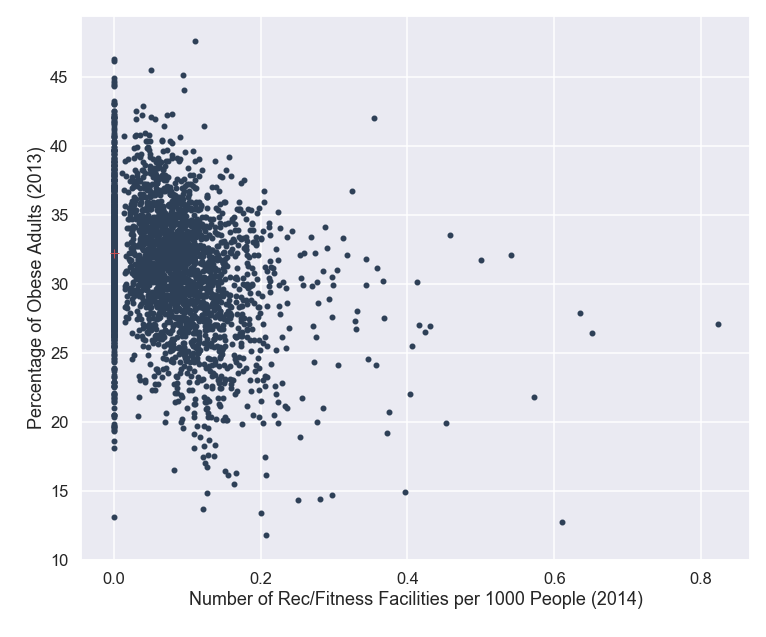

In [18]:
df.plot.scatter(x='RECREATION_FITNESS_FACIL_PER1000_2014', y='ADULT_OBESITY_RATE_2013', c='#2E4057', figsize=(12,10))

# Plot model fit line
# TODO might need to do something with values to get line to appear
xs = np.arange(df['RECREATION_FITNESS_FACIL_PER1000_2014'].min(), df['RECREATION_FITNESS_FACIL_PER1000_2014'].max())
ys = 32.1909 - 17.105 * xs
plt.plot(xs, ys, 'r+', linewidth=10, label='Model')

plt.xlabel('Number of Rec/Fitness Facilities per 1000 People (2014)\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.show()

## Obesity Rate vs. Grocery Stores Per 1000 People

Here, we plot the obesity rate against how many groceries store a county has per 1000 people to give us an idea about how grocery store access can affect obesity rates.

In [19]:
groc_mean = df['GROC_STORES_PER1000_2014'].mean(axis=0)
groc_median = df['GROC_STORES_PER1000_2014'].median(axis=0)
groc_min = df['GROC_STORES_PER1000_2014'].min()
groc_max = df['GROC_STORES_PER1000_2014'].max()

print("Grocery Stores Per 1000 People --- Avg:", groc_mean, "Median:", groc_median, "Min:", groc_min, "Max", groc_max)

Grocery Stores Per 1000 People --- Avg: 0.2514458976150908 Median: 0.194454167 Min: 0.0 Max 3.149606299


### OLS Regression

In [20]:
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ GROC_STORES_PER1000_2014', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.013
Model:                                 OLS   Adj. R-squared:                  0.012
Method:                      Least Squares   F-statistic:                     40.28
Date:                     Wed, 22 May 2019   Prob (F-statistic):           2.51e-10
Time:                             13:26:56   Log-Likelihood:                -9171.4
No. Observations:                     3140   AIC:                         1.835e+04
Df Residuals:                         3138   BIC:                         1.836e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Scatter Plot & Regression Line

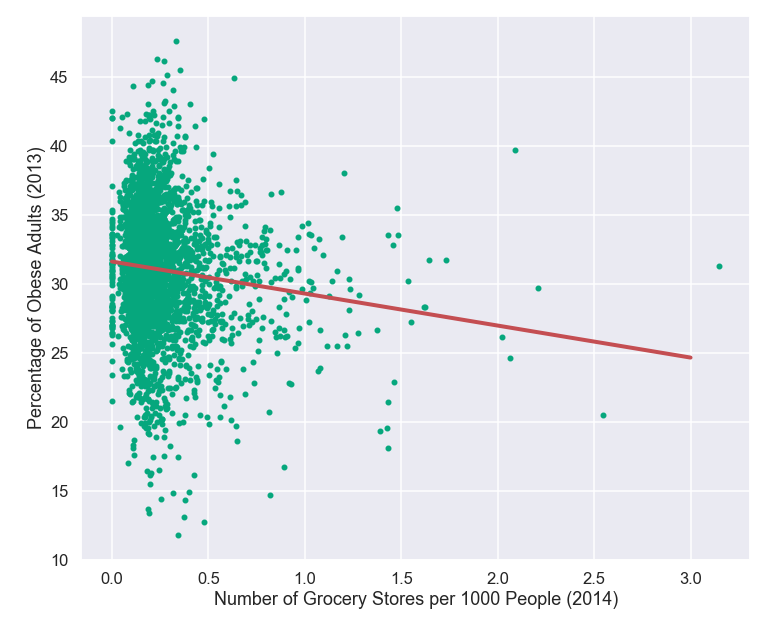

In [21]:
df.plot.scatter(x='GROC_STORES_PER1000_2014', y='ADULT_OBESITY_RATE_2013', c='#06A77D', figsize=(12,10))

# Plot model fit line
xs = np.arange(df['GROC_STORES_PER1000_2014'].min(), df['GROC_STORES_PER1000_2014'].max())
ys =  31.5963 - 2.32 * xs
plt.plot(xs, ys, 'r', linewidth=4, label='Model')

plt.xlabel('Number of Grocery Stores per 1000 People (2014)\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.show()

## Previous 2 Predictors Combined
Cannot combine with level of education (below) since it is a categorical variable

In [22]:
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ RECREATION_FITNESS_FACIL_PER1000_2014 + GROC_STORES_PER1000_2014', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.094
Model:                                 OLS   Adj. R-squared:                  0.094
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Wed, 22 May 2019   Prob (F-statistic):           2.71e-68
Time:                             13:26:56   Log-Likelihood:                -9035.7
No. Observations:                     3140   AIC:                         1.808e+04
Df Residuals:                         3137   BIC:                         1.810e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

## Obesity Rate vs. Percentage with 'Some College' and 'Bachelor's Degree or Higher'

Here, we plot the obesity rate against the percentage of adults in a county that have some college, an associate's, a bachelor's or higher. This is to give us an idea how a population's education level might affect obesity rates.

In [23]:
# Create and add a new column for % adults w/ some college or higher
df['College'] =  df[['Percent of adults completing some college or associate\'s degree, 2013-17', 'Percent of adults with a bachelor\'s degree or higher, 2013-17']].sum(axis=1)

In [24]:
# OLS Regression for at least having some college
# TODO: NEED TO FIX, CATEGORICAL VARIABLE and kind of oversimplifies data

outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ College', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.310
Model:                                 OLS   Adj. R-squared:                  0.310
Method:                      Least Squares   F-statistic:                     1409.
Date:                     Wed, 22 May 2019   Prob (F-statistic):          4.70e-255
Time:                             13:26:56   Log-Likelihood:                -8609.1
No. Observations:                     3140   AIC:                         1.722e+04
Df Residuals:                         3138   BIC:                         1.723e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

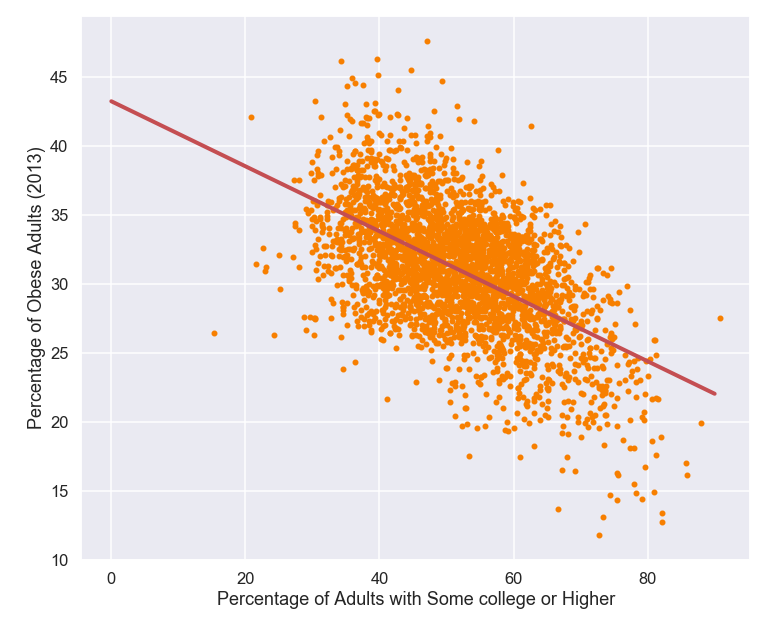

In [25]:
df.plot.scatter(x='College', y='ADULT_OBESITY_RATE_2013', c='#F77F00', figsize=(12,10))

# Plot model fit line
xs = np.arange(df['College'].min(), df['College'].max())
ys =  43.2093 - 0.2355 * xs
plt.plot(xs, ys, 'r', linewidth=4, label='Model')

plt.xlabel('Percentage of Adults with Some college or Higher\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.show()

## TODO Chi-Squared Test for Level of Education?

# Ethics & Privacy

The dataset we will be using is publically available to anyone and is taken from a government agency meaning that all personal identifying information has been removed; thus, our project does not have privacy related issues. The anonymity of our datasets also prevents anyone from using our project and analysis for ill. Both datasets we will be analyzing collected data from various counties across the United States, making this a more representative data set with less collection bias. Hopefully our work will bring more attention to obesity and its causes. 

# Conclusion & Discussion

*Fill in your discussion information here*

Potential discussion topic to mention: doesn't mention quality of grocery stores or rec/fitness facilities.

Are the grocery stores affordable? High-end facilitities like luxury gyms/classes or community/city ran rec centers? etc. etc.